<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Avocado_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
from keras import models
from keras import layers
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set_style('whitegrid')
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#download data
url = 'drive/My Drive/datasets/avocado.csv'
avocado = pd.read_csv(url)

In [0]:
#drop Useless column
avocado = avocado.drop(['Unnamed: 0'],axis =1 )

#Rename column key names
names = ['date','avprice','totalvol','small','large','xlarge',
         'totalbags','smallbags','largebags','xlargebags','type','year','region']
avocado = avocado.rename(columns=dict(zip(avocado.columns,names)))

In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18249 non-null  object 
 1   avprice     18249 non-null  float64
 2   totalvol    18249 non-null  float64
 3   small       18249 non-null  float64
 4   large       18249 non-null  float64
 5   xlarge      18249 non-null  float64
 6   totalbags   18249 non-null  float64
 7   smallbags   18249 non-null  float64
 8   largebags   18249 non-null  float64
 9   xlargebags  18249 non-null  float64
 10  type        18249 non-null  object 
 11  year        18249 non-null  int64  
 12  region      18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [0]:
#Append Year, Month, Day data 
avocado['Year'],avocado['Month'],avocado['Day'] = avocado['date'].str.split('-').str

In [0]:
#Transform data type to int from string
for i in ['Year','Month','Day']:
  avocado[i] = list(map(float,avocado[i]))

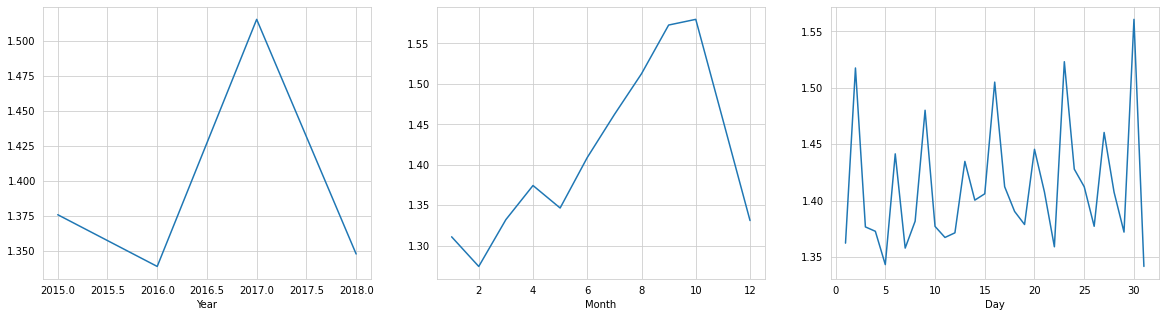

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(131)
Years = avocado.groupby('Year').mean()
Years['avprice'].plot(x=avocado.Year)
plt.subplot(132)
Months = avocado.groupby('Month').mean()
Months['avprice'].plot(x=avocado.Month)
plt.subplot(133)
Days = avocado.groupby('Day').mean()
Days['avprice'].plot(x=avocado.Day)

Text(0, 0.5, 'Regions')

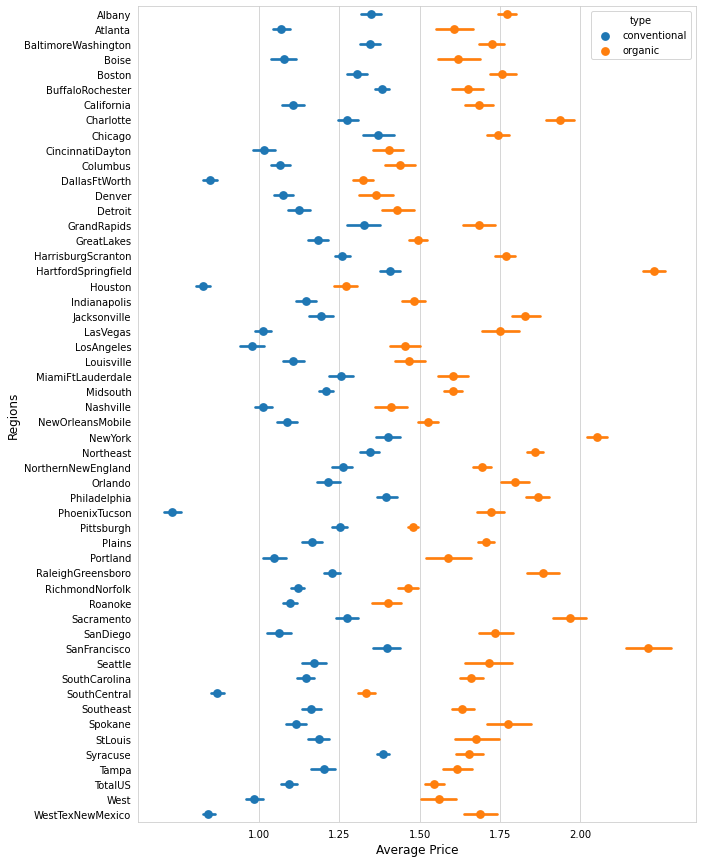

In [8]:
plt.figure(figsize=(10,15))
sns.pointplot(x='avprice',y='region',data=avocado,hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize':'large'})
plt.ylabel('Regions',{'fontsize':'large'})

In [9]:
#One hot encoding
ohe = pd.get_dummies(avocado[['region','type']])
ohe

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
y = np.array(avocado['avprice'])
data = np.array(avocado)
X = np.c_[data[:,2:10],data[:,13:16],np.array(ohe)]

In [0]:
transform = MinMaxScaler()
X = transform.fit_transform(X)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
network = models.Sequential()
network.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))
network.add(layers.Dense(64,activation='relu',kernel_initializer='he_normal'))
network.add(layers.Dense(1))
network.compile(optimizer='rmsprop',
                loss='mean_squared_error',
                )               

network2 = models.Sequential([
                              layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(1)
])
network2.compile(optimizer=optimizers.Nadam(),
                 loss='mean_squared_error',
                 )

network3 = models.Sequential([
                              layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(1)
])
network3.compile(optimizer=optimizers.SGD(),
                 loss='mean_squared_error',
                 )

network4 = models.Sequential([
                              layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(1)
])
network4.compile(optimizer=optimizers.Adadelta(),
                 loss='mean_squared_error',
                 )

network5 = models.Sequential([
                              layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(1)
])
network5.compile(optimizer=optimizers.Adam(),
                 loss='mean_squared_error',
                 )

network6 = models.Sequential([
                              layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
                              layers.Dense(1)
])
network6.compile(optimizer=optimizers.Adagrad(),
                 loss='mean_squared_error',
                 )

history1 = network.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2,)
history2 = network2.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)
history3 = network3.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)
history4 = network4.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)
history5 = network5.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)
history6 = network6.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 11679 samples, validate on 2920 samples
Epoch 1/50
11679/11679 [==============================] - 2s 160us/step - loss: 0.1533 - val_loss: 0.0763
Epoch 2/50
11679/11679 [==============================] - 0s 22us/step - loss: 0.0632 - val_loss: 0.0628
Epoch 3/50
11679/11679 [==============================] - 0s 19us/step - loss: 0.0582 - val_loss: 0.0728
Epoch 4/50
11679/11679 [==============================] - 0s 18us/step - loss: 0.0564 - val_loss: 0.0589
Epoch 5/50
11679/11679 [==============================] - 0s 18us/step - loss: 0.0530 - val_loss: 0.0528
Epoch 6/50
11679/11679 [==============================] - 0s 18us/step - loss: 0.0513 - val_loss: 0.0522
Epoch 7/50
11679/11679 [==============================] - 0s 21us/step - loss: 0.0495 - val_loss: 0.0657
Epoch 8/50
11679/11679 [==============================] - 0s 19us/step - loss: 0.0481 - val_loss: 0.0516
Epoch 9/50
11679/11679 [====

In [0]:
def compare_graph(network,X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(100):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  
  plt.plot(index,real,'b-',label='Real Price')
  plt.plot(index,pred,'r--',label='Pred price')
  plt.legend(loc='center left',fontsize=12)

def history_graph(history,axes=None,title=None):
  pd.DataFrame(history.history).plot(ax=axes,figsize=(30,15),title=title)
  plt.gca().set_ylim(0,0.3)

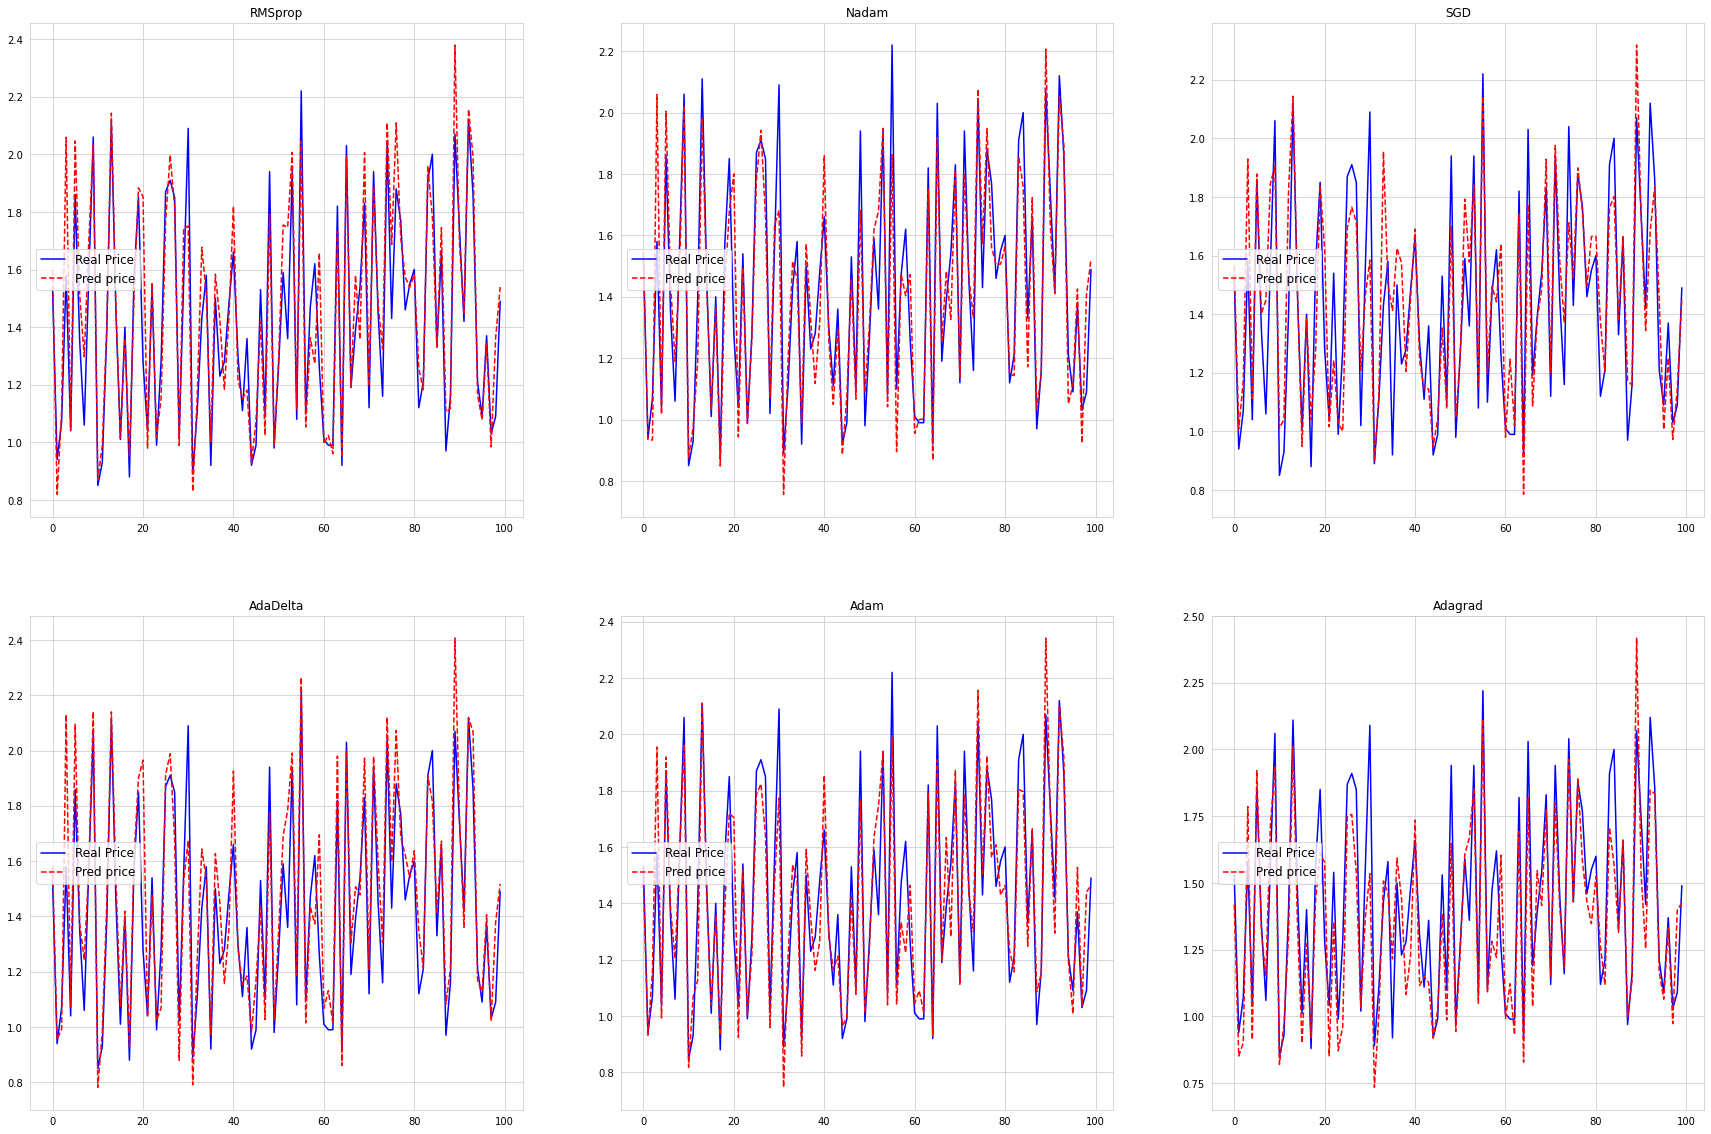

In [15]:
plt.figure(figsize=(30,20))

plt.subplot(231)
plt.title('RMSprop',fontdict={'fontsize':'large'})
compare_graph(network,X_test,y_test)
plt.subplot(232)
plt.title('Nadam',)
compare_graph(network2,X_test,y_test)
plt.subplot(233)
plt.title('SGD')
compare_graph(network3,X_test,y_test)
plt.subplot(234)
plt.title('AdaDelta')
compare_graph(network4,X_test,y_test)
plt.subplot(235)
plt.title('Adam')
compare_graph(network5,X_test,y_test)
plt.subplot(236)
plt.title('Adagrad')
compare_graph(network6,X_test,y_test)

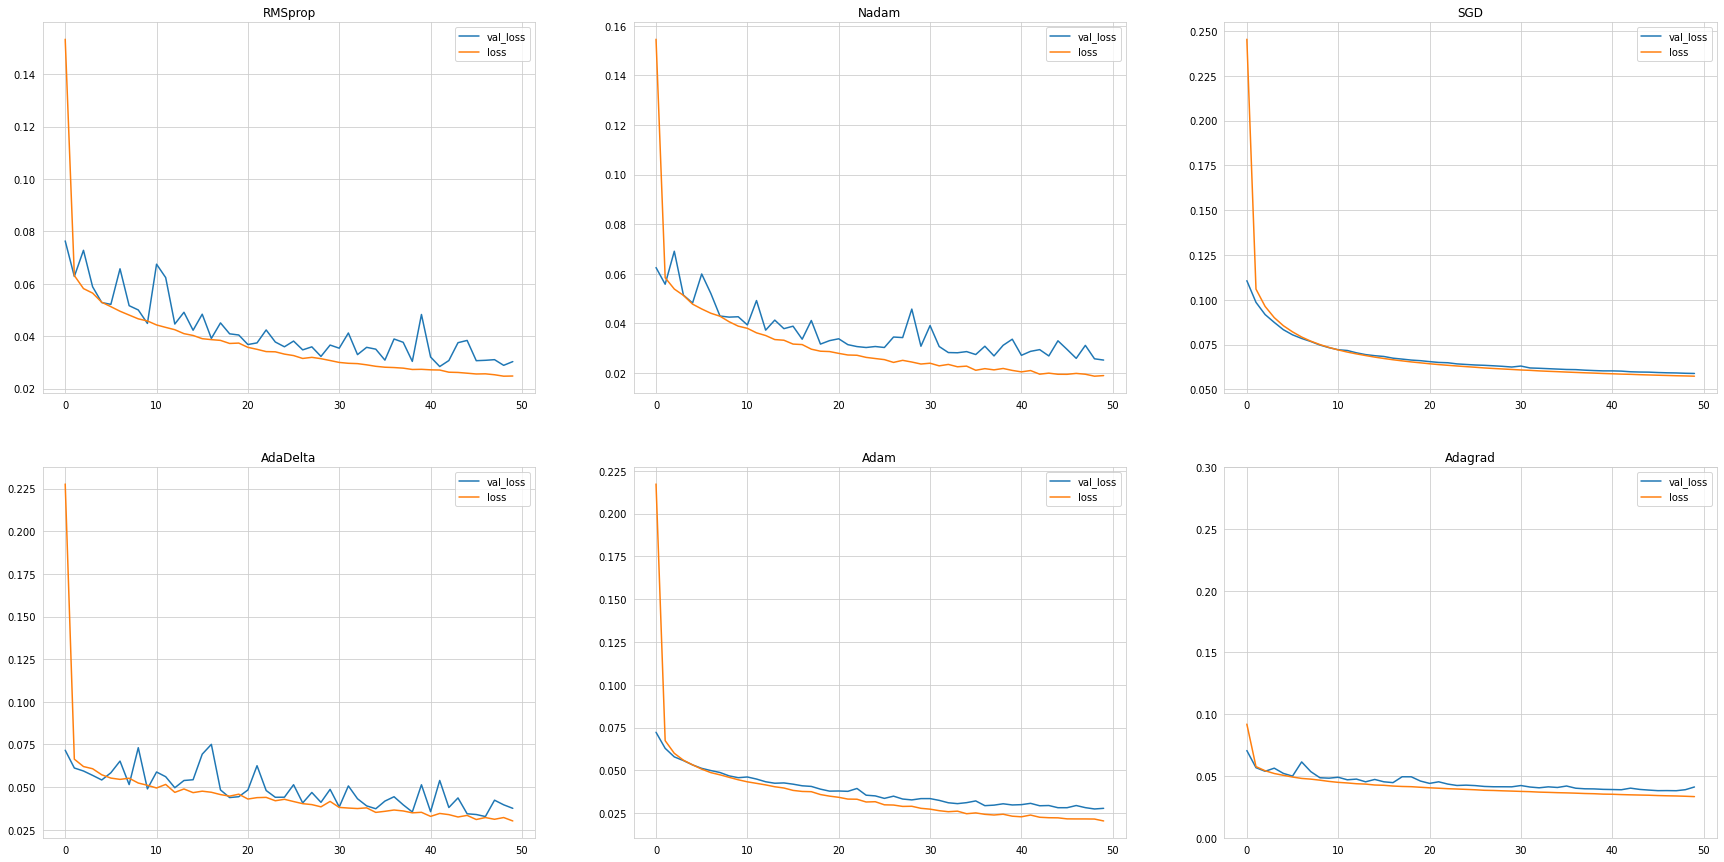

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=3)

history_graph(history1,axes=axes[0,0],title='RMSprop')
history_graph(history2,axes=axes[0,1],title='Nadam')
history_graph(history3,axes=axes[0,2],title='SGD')
history_graph(history4,axes=axes[1,0],title='AdaDelta')
history_graph(history5,axes=axes[1,1],title='Adam')
history_graph(history6,axes=axes[1,2],title='Adagrad')